# **Sentiment Analysis**

# Exploratory Data Analysis (EDA)

**1. Loading the Data**

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('Data/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


**2. Data Cleaning**

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing rows (if any)
df.dropna(inplace=True)

Missing values:
 review       0
sentiment    0
dtype: int64


**3. Statistical Analysis**

In [6]:
# Class distribution
class_dist = df['sentiment'].value_counts()
print("Class Distribution:\n", class_dist)

# Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print("\nReview Length Stats:\n", df['review_length'].describe())

Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Review Length Stats:
 count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


# **4. Visualizations**

**A. Class Distribution**

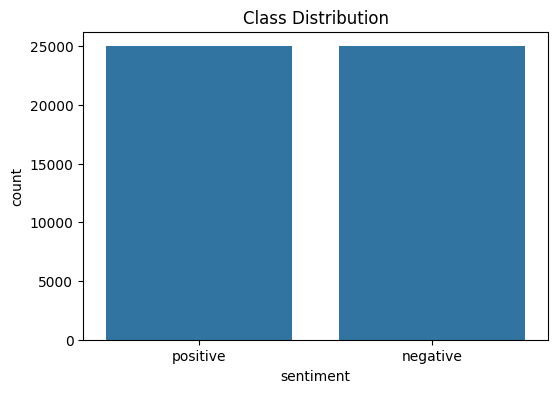

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution")
plt.show()

**B. Review Length Histogram**

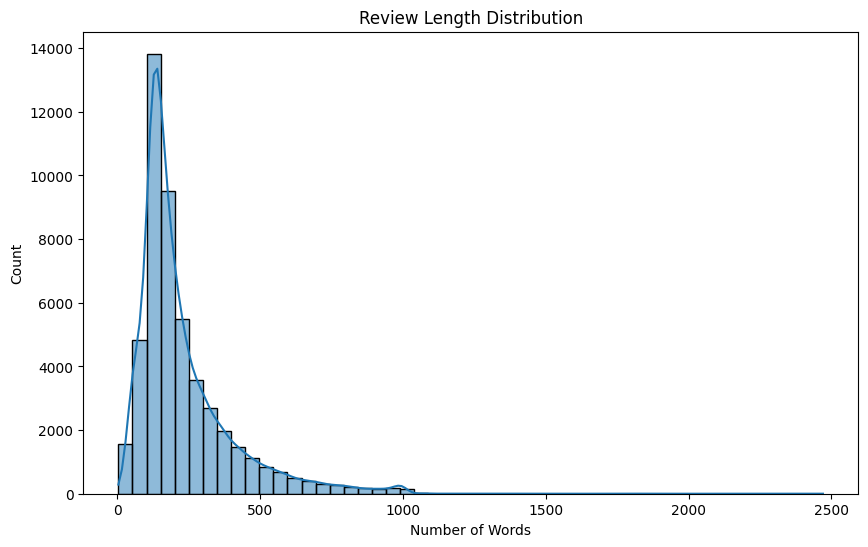

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

In [14]:
!pip install wordcloud nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 217.9 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 186.2 kB/s eta 0:00:01
     -------------------------------------  41.0/41.5 kB 178.6 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 143.0 kB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/273.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/273.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/273.6 kB 495.5 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/273.6 kB 409.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/273.6 kB 409.6 kB/s eta 0:00:01
   --------------- ----------------------

**C. Word Clouds**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


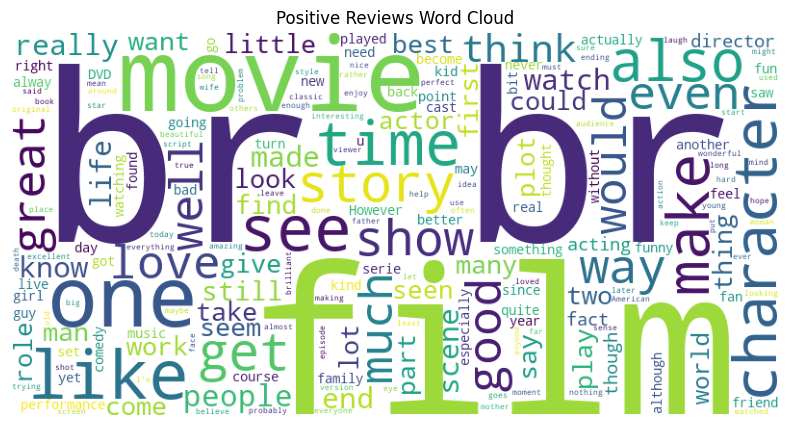

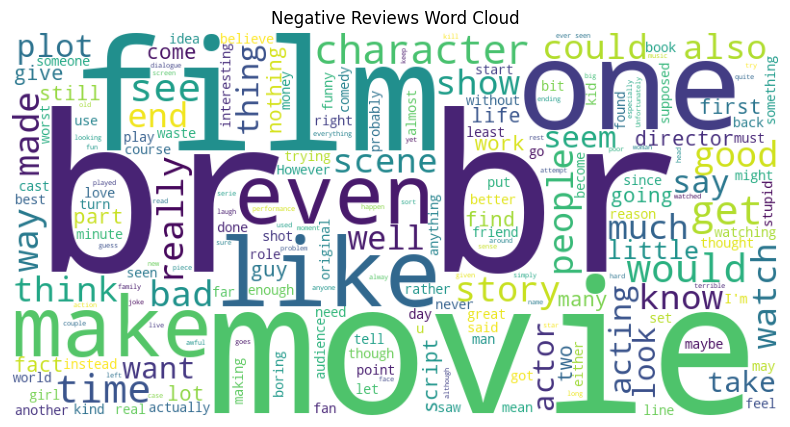

In [15]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter positive/negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

generate_wordcloud(positive_reviews, "Positive Reviews Word Cloud")
generate_wordcloud(negative_reviews, "Negative Reviews Word Cloud")